In [1]:
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [204]:
with open('../../Downloads/regret_case_two_person_dict.pkl','rb') as f:
    pooled = pickle.load(f) 

In [233]:
(1.5-1.09)**2

0.16809999999999994

In [234]:
(1.09-1.07)**2

0.0004000000000000007

In [231]:
np.array(alls).mean()

0.07047619047619047

In [230]:
d =pooled[pd.Timestamp('2015-10-16 19:00:00')]
alls = []
for k,v in d.items():
    print(k)
    print(v)
    
    mymean = np.array(list(v.values())).mean()
    print(mymean)
    print(sum([(r-mymean)**2 for r in list(v.values())]))
    alls.extend(list(v.values()))

1
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0}
0.0
0.0
2
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0}
0.0
0.0
4
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.5, 5: 0.0, 6: 0.0, 7: 0.5, 8: 0.5, 9: 0.0, 10: 0.0, 11: 0.

In [148]:
all_averages = []
for person in pooled[pd.Timestamp('2015-08-27 10:00:00')]:
    print(person)
    all_averages.extend(pooled[pd.Timestamp('2015-08-27 10:00:00')][person].values())

0
2
4
5
6
7
8
9
10
11
12
13
14
15
16
18
19
21
22
23
24
25
26
27
28
29
30
31


In [149]:
np.array(all_averages).std()

0.06722235984600143

In [187]:
 np.array([np.array(list(pooled[pd.Timestamp('2015-08-27 10:00:00')][i].values())).std() for i in pooled[pd.Timestamp('2015-08-27 10:00:00')].keys()]).mean()

0.05249286458231495

In [27]:
with open('../distributions_rl4rl/time_to_active_participants_pop_32_short_staggered_12.pkl','rb') as f:
    act = pickle.load(f)

In [210]:
def get_ssw_one_time(a_dict):
    
    temp = []
    for person,sim in a_dict.items():
        
        #print(sim.keys())
        my_average = np.array(list(sim.values())).mean()
        
        t = [(r-my_average)**2 for r in list([abs(r) for r in sim.values()])]
        temp.append(sum(t))
    print(temp)        
    return sum(temp)
    

In [211]:
def get_ssb_one_time(a_dict):
    
    alls = []
    
    for person,sim in a_dict.items():
        t = [r for r in list(sim.values())]
        alls.extend(t)
    global_mean = np.array(alls).mean()
    temp = []
    for person,sim in a_dict.items():
        
        my_average = np.array(list([abs(r) for r in sim.values()])).mean()
        temp.append(50*(my_average-global_mean)**2)
        
    return sum(temp)
        
        

In [212]:
def get_sst_one_time(a_dict):
    
    alls = []
    
    for person,sim in a_dict.items():
        #t = [r for r in list(sim.values())]
        alls.extend(sim.values())
    global_mean = np.array(alls).mean()
    temp = []
    for person,sim in a_dict.items():
        
        my_average = [(r-global_mean)**2 for r in list([abs(r) for r in sim.values()])]
        temp.append(sum(my_average))
    return sum(temp)
        

In [213]:
ssw = get_ssw_one_time(pooled[pd.Timestamp('2015-10-10 19:00:00')])

ssb =  get_ssb_one_time(pooled[pd.Timestamp('2015-10-10 19:00:00')])
sst =  get_sst_one_time(pooled[pd.Timestamp('2015-10-10 19:00:00')])
print(ssw+ssb)
print(sst)
print(ssw)
print(ssb)

[0.5362499999999999, 0.03000000000000006, 3.167449999999996, 5.906250000000001, 4.826249999999999, 4.499999999999998, 4.151250000000002, 0.02405000000000003, 3.736049999999998, 2.2324499999999987, 0.027200000000000033, 2.5954500000000023, 2.2324499999999987, 0.4767999999999995, 0.03000000000000006, 0.02625000000000004, 3.167449999999998, 2.2324499999999983, 0.6300000000000003, 0.022800000000000053, 2.595450000000001, 0.6562499999999999, 0.030800000000000046, 3.2712, 0.028050000000000068]
51.04175199999998
51.04175199999999
47.13259999999998
3.9091520000000006


In [169]:
44.592542857142845/32

1.393516964285714

In [162]:
pooled[pd.Timestamp('2015-10-15 19:00:00')].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31])

In [214]:
def get_all(d):
    times_ssw = {}
    times_ssb = {}
    times_sst = {}
    for time in d.keys():
        times_ssw[time]=get_ssw_one_time(d[time])
        times_ssb[time]=get_ssb_one_time(d[time])
        times_sst[time]=get_sst_one_time(d[time])
    return times_ssw,times_ssb,times_sst

In [215]:
def get_weekly_averages(points):
    to_return = []
    for i in range(0,len(points),35):
        temp = points[i:i+35]
        to_return.append(np.array(temp).mean())
    return to_return

In [216]:
sswall,ssball,sstall = get_all(pooled)

[2.5272, 2.3328, 2.4947999999999992, 0.03105000000000003, 0.029450000000000004, 0.03105000000000003, 0.031050000000000032, 0.030000000000000027, 0.03079999999999997, 2.4947999999999997, 0.031050000000000032, 0.030450000000000026, 2.5271999999999997, 0.031199999999999995, 0.031199999999999995, 2.494799999999999, 2.466450000000001, 0.03119999999999999, 2.4947999999999992, 0.031199999999999995, 2.4664500000000005, 2.5272, 2.4947999999999992, 2.4299999999999997, 0.031199999999999995, 2.43]
[2.5312500000000004, 0.7762500000000006, 0.02719999999999999, 0.7612499999999994, 0.030450000000000026, 0.02805000000000001, 0.030450000000000022, 0.7800000000000004, 2.515049999999998, 0.030799999999999977, 0.03125000000000002, 0.03125000000000002, 0.7699999999999998, 2.515049999999998, 0.78125, 0.03119999999999999, 2.0412, 0.030450000000000022, 2.4947999999999997, 0.7800000000000001, 2.5271999999999997, 2.515049999999998]
[0.0, 0.0, 0.49280000000000035, 3.1200000000000014, 3.1200000000000014, 1.0799999

[0.745199999999999, 0.7800000000000002, 0.025199999999999972, 0.46125000000000005, 0.46125, 0.030450000000000026, 0.029450000000000004, 1.069199999999999, 0.025199999999999972, 0.53625, 0.68, 0.016800000000000016, 0.01125000000000002, 0.41999999999999954, 0.7199999999999998, 1.360800000000001, 1.494450000000001, 0.33000000000000024, 0.7012499999999998, 0.57, 0.7699999999999996, 0.9112500000000011, 0.5700000000000005, 1.219050000000002]
[0.07679999999999985, 0.0, 0.0, 0.7200000000000003, 0.6047999999999997, 2.520000000000001, 0.8208, 0.7722000000000004, 2.1450000000000005, 0.5000000000000003, 1.0961999999999996, 1.0368, 0.49680000000000035, 1.8449999999999998, 2.52, 0.0, 0.0, 0.7200000000000004, 0.40320000000000034, 0.0, 0.48000000000000037, 1.0961999999999996]
[0.4608000000000003, 0.0, 0.0, 0.8657999999999993, 1.6799999999999986, 2.4050000000000007, 0.8657999999999995, 0.47520000000000007, 0.18000000000000013, 1.0368, 0.0, 0.9450000000000003, 0.4927999999999997, 1.0799999999999994, 2.8

[0.57, 0.02405000000000003, 0.02880000000000006, 6.1199999999999966, 2.72505, 3.3862500000000013, 1.8210500000000025, 3.944450000000004, 0.6799999999999997, 5.130000000000001, 0.02405000000000003, 2.420000000000001, 0.025200000000000056, 3.5260499999999984, 2.0612, 0.02945000000000003, 4.151250000000003, 1.3612500000000018, 0.027200000000000033, 2.4200000000000026, 0.57, 4.365199999999998, 0.026250000000000048, 0.020000000000000014, 0.57]
[0.38480000000000003, 0.4199999999999999, 0.36480000000000046, 1.3200000000000012, 1.7897999999999987, 0.720000000000001, 2.2800000000000007, 2.308800000000001, 2.805, 0.0, 1.3362000000000007, 0.3847999999999999, 1.0097999999999998, 0.47120000000000006, 2.405, 1.5511999999999997, 1.8671999999999982, 0.11280000000000015, 0.3648000000000004, 0.0, 1.4208, 2.185799999999998, 2.000000000000001, 0.9887999999999993, 0.4800000000000004, 0.4928000000000005]
[0.3847999999999999, 0.2952000000000002, 0.6047999999999993, 1.7282000000000008, 1.8449999999999998, 1.6

[0.3847999999999998, 0.4351999999999999, 2.28, 1.0961999999999998, 2.1450000000000022, 1.320000000000001, 1.6799999999999986, 0.5000000000000003, 0.945, 0.38480000000000014, 1.0098, 0.0, 0.7722000000000008, 0.9791999999999998, 2.879999999999999, 1.0098, 0.0, 0.0, 0.4608000000000003, 2.000000000000001, 0.9071999999999995, 0.47120000000000006, 1.0098, 0.0, 0.0, 0.4608000000000004, 1.8449999999999998]
[0.9587999999999997, 0.8374499999999991, 0.0168, 0.46125000000000005, 0.3762499999999995, 0.02805000000000001, 0.6300000000000001, 0.7800000000000001, 0.46125, 0.7199999999999998, 0.5000000000000001, 0.7612499999999993, 0.02519999999999997, 0.016799999999999995, 0.019999999999999997, 0.8064499999999993, 0.7451999999999993, 1.360800000000001, 0.41999999999999965, 1.0692000000000006, 0.02404999999999999, 0.7612499999999993, 0.6799999999999997, 0.5700000000000004, 0.7451999999999993, 0.6299999999999999, 0.7500000000000001]
[2.0374500000000006, 2.658800000000001, 0.031200000000000054, 0.02625000

In [217]:
to_plot = [sswall[t]/sstall[t] for t in sorted(sstall.keys())]

In [218]:
ts2 = get_weekly_averages(to_plot)

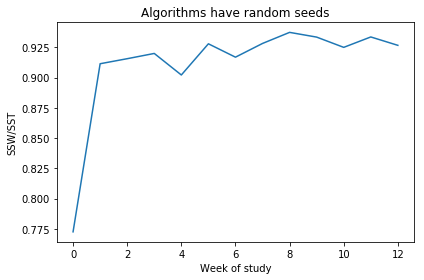

In [219]:
plt.plot(ts2)
plt.ylabel('SSW/SST')
plt.xlabel('Week of study')
plt.title('Algorithms have random seeds')
plt.tight_layout()
#plt.savefig('between study variance (SSG) over total measure of variability (SST) algorithm random seeds')
